In [2]:
import pandas as pd
FILE = 'datasets/namur-thermographie-par-quartier.csv'
df = pd.read_csv(FILE, delimiter=';')


In [8]:
df.columns

Index(['Nom de quartier', 'Code de quartier', 'Thermographie moyenne',
       'Classe thermographique (de 1 à 6)', 'Valeur minimale de la thermo.',
       'Valeur maximale de la thermo.', 'Valeur médiane de la thermo.',
       'Nombre de toitures par quartier',
       'Ecart-type de la thermo. sur le quartier',
       'Année de construction moyenne', 'Proportion moyenne de propriétaires',
       'Revenu moyen', 'Date de la donnée source', 'Geo Shape', 'Geo Point'],
      dtype='object')

In [4]:
cat1 = 'Classe thermographique (de 1 à 6)'
cat2 = 'Revenu moyen'

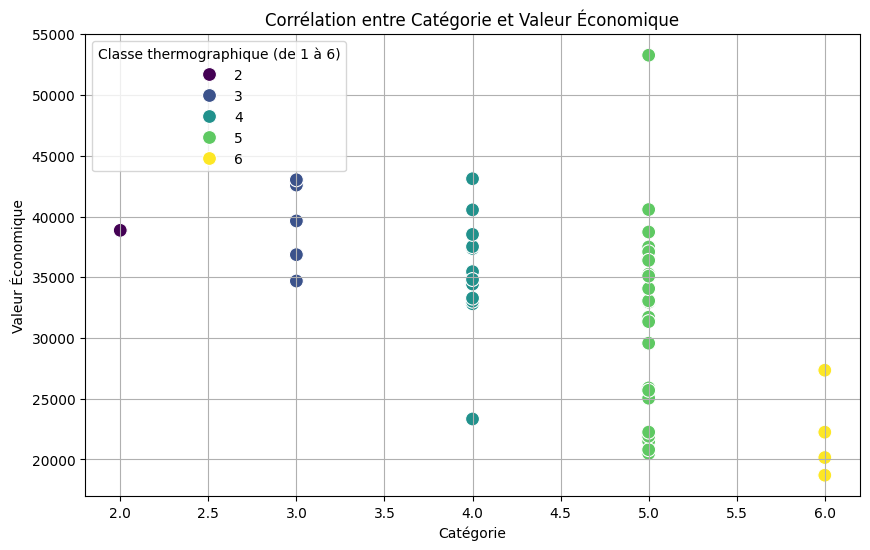

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=cat1, y=cat2, data=df, hue=cat1, palette="viridis", s=100)

plt.title("Corrélation entre Catégorie et Valeur Économique")
plt.xlabel("Catégorie")
plt.ylabel("Valeur Économique")
plt.grid(True)
plt.show()

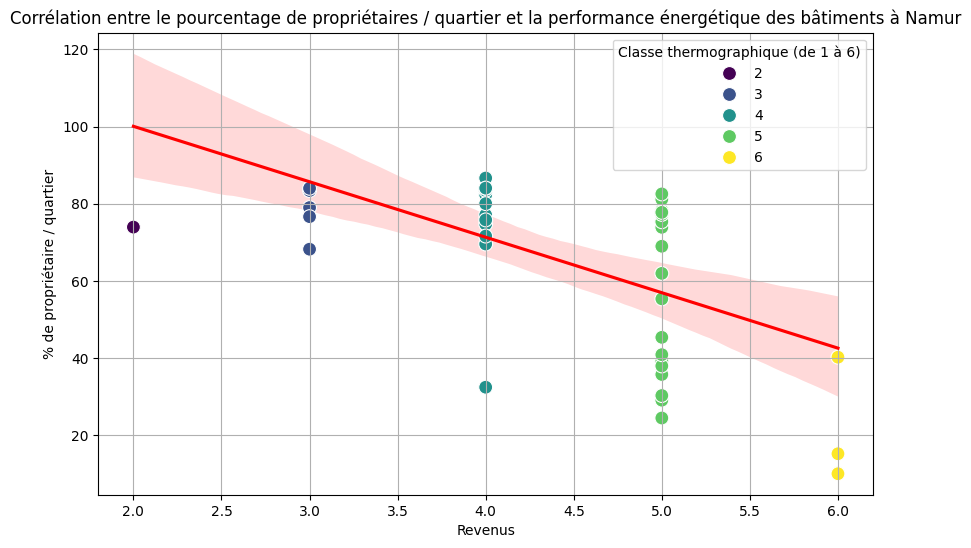

In [33]:
cat3 = 'Proportion moyenne de propriétaires'
cat1 = 'Classe thermographique (de 1 à 6)'

plt.figure(figsize=(10,6))
sns.regplot(x=cat1, y=cat3, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x=cat1, y=cat3, data=df, hue=cat1, palette="viridis", s=100)
plt.title("Corrélation entre le pourcentage de propriétaires / quartier et la performance énergétique des bâtiments à Namur")
plt.xlabel("Revenus")
plt.ylabel("% de propriétaire / quartier")
plt.grid(True)
plt.show()

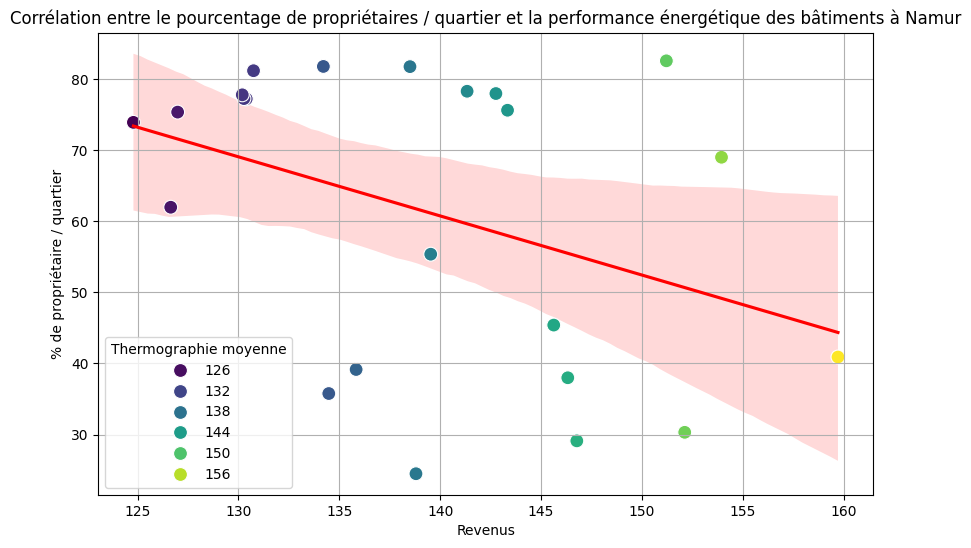

In [36]:
filtered = df.loc[df[cat1] == 5]
cat3 = 'Proportion moyenne de propriétaires'
cat1 = 'Thermographie moyenne'

plt.figure(figsize=(10,6))
sns.regplot(x=cat1, y=cat3, data=filtered, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x=cat1, y=cat3, data=filtered, hue=cat1, palette="viridis", s=100)
plt.title("Corrélation entre le pourcentage de propriétaires / quartier et la performance énergétique des bâtiments à Namur")
plt.xlabel("Revenus")
plt.ylabel("% de propriétaire / quartier")
plt.grid(True)
plt.show()

In [26]:
filtered = df.loc[df[cat1] == 5]
filtered[cat3].std()

for cat in range(1, 7):
    filtered = df.loc[df[cat1] == cat]
    print('Catégorie', cat, '-->', filtered[cat3].std())

Catégorie 1 --> nan
Catégorie 2 --> nan
Catégorie 3 --> 6.39390471998231
Catégorie 4 --> 14.048693398931684
Catégorie 5 --> 20.657219003392743
Catégorie 6 --> 14.406338313706932


In [ ]:
'Nom de quartier', 'Code de quartier', 'Thermographie moyenne',
       'Classe thermographique (de 1 à 6)', 'Valeur minimale de la thermo.',
       'Valeur maximale de la thermo.', 'Valeur médiane de la thermo.',
       'Nombre de toitures par quartier',
       'Ecart-type de la thermo. sur le quartier',
       'Année de construction moyenne', 'Proportion moyenne de propriétaires',
       'Revenu moyen', 'Date de la donnée source', 'Geo Shape', 'Geo Point'

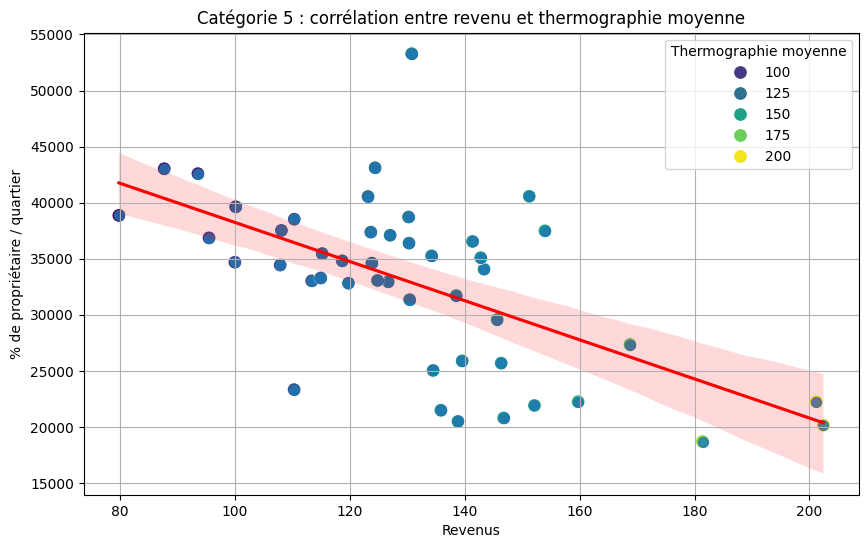

In [31]:
filtered = df.loc[df[cat1] == 5]

cat1 = 'Thermographie moyenne'
cat2 = 'Revenu moyen'

moyenne = df[cat2].mean()

plt.figure(figsize=(10,6))
sns.scatterplot(x=cat1, y=cat2, data=df, hue=cat1, palette="viridis", s=100)
sns.regplot(x=cat1, y=cat2, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title("Catégorie 5 : corrélation entre revenu et thermographie moyenne")
plt.xlabel("Revenus")
plt.ylabel("% de propriétaire / quartier")
plt.grid(True)
plt.show()

In [44]:
best_isolation = df.loc[df['Classe thermographique (de 1 à 6)'] < 4]
best_isolation

,Nom de quartier,Code de quartier,Thermographie moyenne,Classe thermographique (de 1 à 6),Valeur minimale de la thermo.,Valeur maximale de la thermo.,Valeur médiane de la thermo.,Nombre de toitures par quartier,Ecart-type de la thermo. sur le quartier,Année de construction moyenne,Proportion moyenne de propriétaires,Revenu moyen,Date de la donnée source,Geo Shape,Geo Point
4,Géronsart,J4,93.524853,3,4,254,92.0,1871,42.544174,1979.566694,83.437780,42593.676368,2018-02-24T01:00:00+01:00,"{""coordinates"": [[[4.8944088588, 50.4489588523...","50.436558423694045, 4.894497198908928"
10,Frizet,V1,100.102516,3,2,254,97.0,1073,53.352187,1965.296980,84.012066,39638.478652,2018-02-24T01:00:00+01:00,"{""coordinates"": [[[4.8645225198, 50.4965716502...","50.48532035035065, 4.865919997929231"
23,Gelbressée,GB,79.763107,2,1,248,67.0,515,56.960241,1931.228374,73.962264,38866.922388,2018-02-24T01:00:00+01:00,"{""coordinates"": [[[4.9531598834, 50.5225199815...","50.51047065851178, 4.955259449496854"
25,Montagne,J3,99.962675,3,5,253,98.0,1286,42.739207,1957.787879,68.233618,34693.233562,2018-02-24T01:00:00+01:00,"{""coordinates"": [[[4.8889475736, 50.4618670298...","50.453521650384914, 4.887002211622669"
41,Erpent,EP,87.652568,3,7,240,85.0,993,40.181131,1964.493976,79.019608,43028.714710,2018-02-24T01:00:00+01:00,"{""coordinates"": [[[4.9171355861, 50.4647510074...","50.45312271343248, 4.909633553631267"
44,Vierly,W0,95.455782,3,4,253,92.0,1764,48.419756,1958.766310,76.669990,36861.818792,2018-02-24T01:00:00+01:00,"{""coordinates"": [[[4.8615025682, 50.4360425945...","50.42179773823752, 4.845399972468962"
